In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('teste2_dados_20000.txt') as f:
    lines = f.readlines()

In [3]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

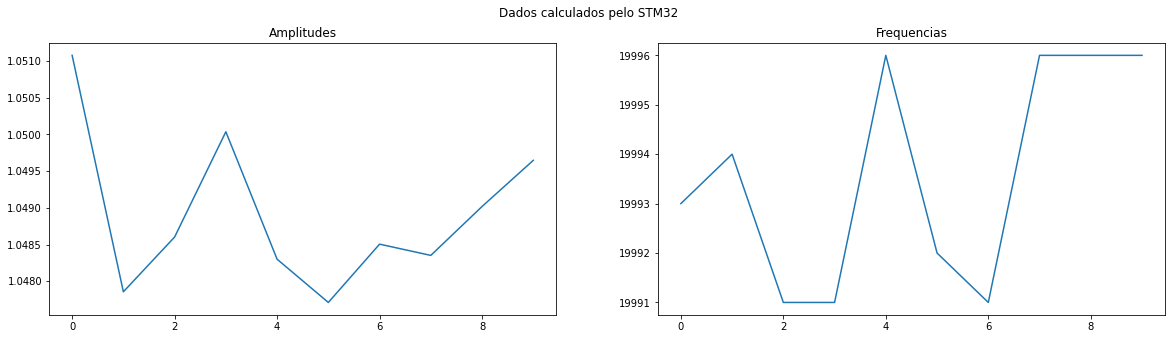

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [5]:
dados.shape

(10, 600)

In [6]:
linha = 6

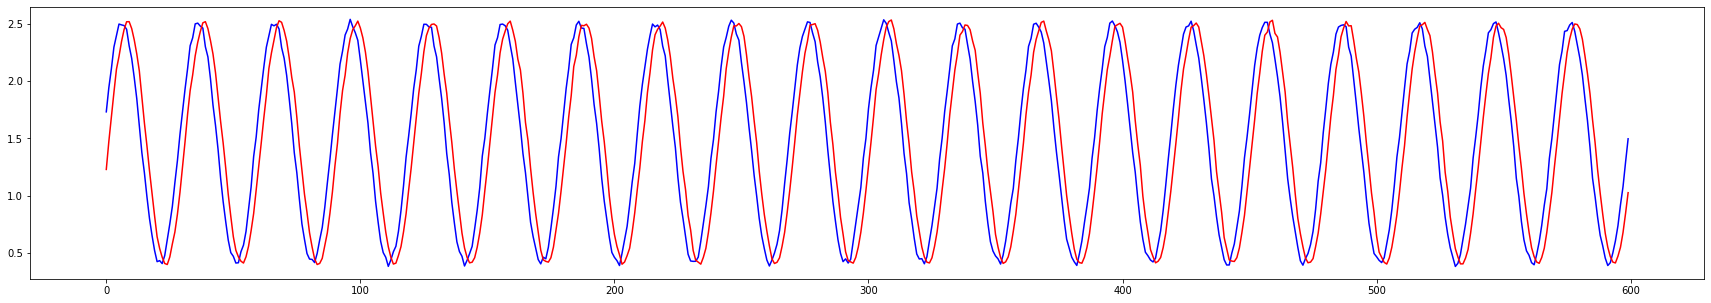

In [7]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[linha,:limite]*k,'b-')
plt.plot(dados[0,:limite]*k,'r-')
plt.show()

In [8]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [9]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [10]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


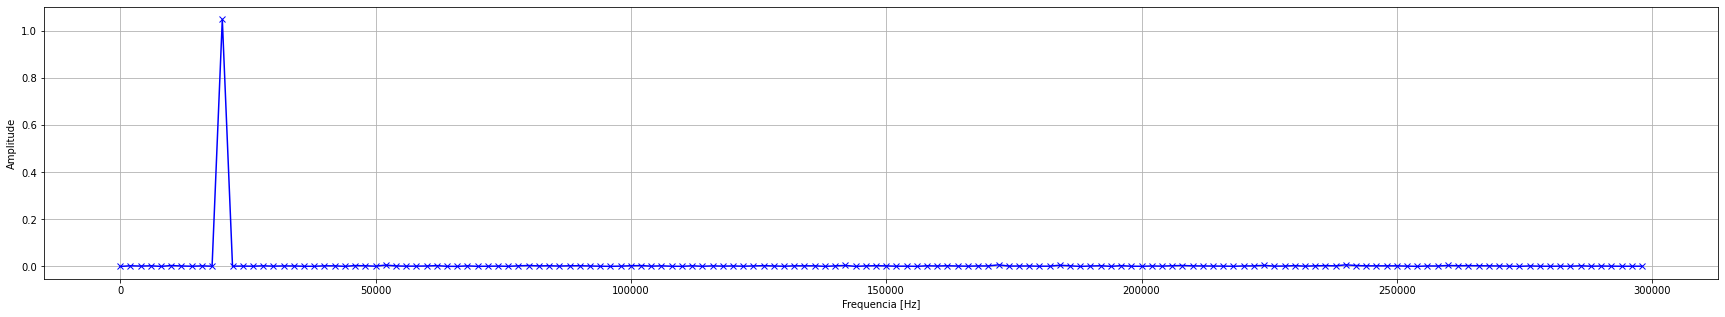

In [11]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


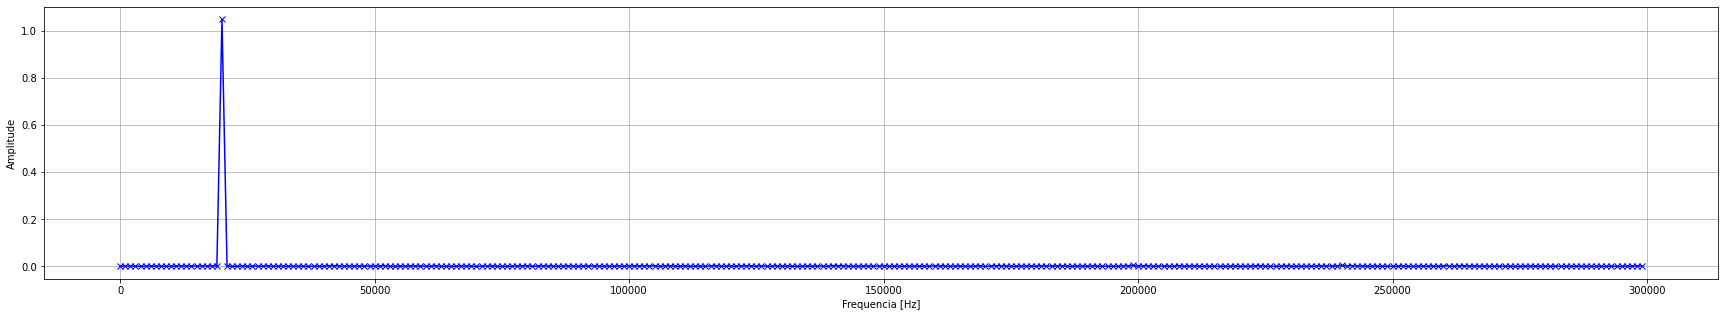

In [12]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [13]:
frequencia = 20000
sample_freq = 600000
npontos_range = range(60,600,10)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=20000Hz')

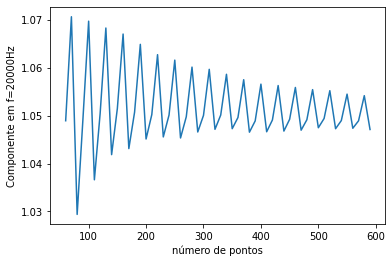

In [14]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [15]:
frequencia = 20000
sample_freq = 600000
npontos = 30
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=20000Hz')

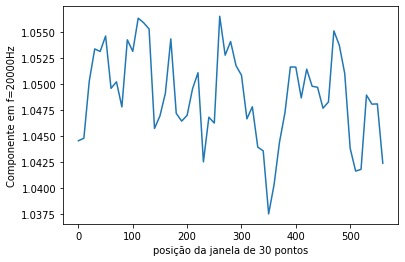

In [16]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [17]:
frequencia_range = range(17000,22000,10)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [18]:
frequencia_range2 = range(17000,22000,10)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [19]:
frequencia_range3 = range(17000,22000,10)
sample_freq = 600000
npontos3 = 60
componentes3 = [componente_precisa((dados[linha,:npontos3]-np.mean(dados[linha,:npontos3]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range3]

In [20]:
frequencia_range4 = range(17000,22000,10)
sample_freq = 600000
npontos4 = 30
componentes4 = [componente_precisa((dados[linha,:npontos4]-np.mean(dados[linha,:npontos4]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range4]

In [21]:
idx_pico = np.argmax(componentes)
print(idx_pico)

297


In [22]:
# olhando 300 pontos
for pontos in range(0,11,1):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.005493904454353436%
dif freq: 2Hz	Erro: 0.01920469653091845%
dif freq: 3Hz	Erro: 0.041132682183183986%
dif freq: 4Hz	Erro: 0.07127695283162426%
dif freq: 5Hz	Erro: 0.10963538511999135%
dif freq: 6Hz	Erro: 0.15620464088620734%
dif freq: 7Hz	Erro: 0.21098016734576308%
dif freq: 8Hz	Erro: 0.27395619748851174%
dif freq: 9Hz	Erro: 0.3451257506899346%
dif freq: 10Hz	Erro: 0.4244806335350834%


In [23]:
# olhando 600 pontos
idx_pico = np.argmax(componentes2)
for pontos in range(0,10,1):
    erro_perc = ((componentes2[idx_pico]-componentes2[idx_pico-pontos])/componentes2[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.020729018532451446%
dif freq: 2Hz	Erro: 0.07433567462429522%
dif freq: 3Hz	Erro: 0.16079798159044725%
dif freq: 4Hz	Erro: 0.2800745123640261%
dif freq: 5Hz	Erro: 0.4321044219576976%
dif freq: 6Hz	Erro: 0.6168074836039014%
dif freq: 7Hz	Erro: 0.8340841385496123%
dif freq: 8Hz	Erro: 1.0838155594758248%
dif freq: 9Hz	Erro: 1.3658637274962426%


In [24]:
# olhando 60 pontos
idx_pico = np.argmax(componentes3)
for pontos in range(0,40,4):
    erro_perc = ((componentes3[idx_pico]-componentes3[idx_pico-pontos])/componentes3[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 4Hz	Erro: 0.0028613823603160934%
dif freq: 8Hz	Erro: 0.010950779101218756%
dif freq: 12Hz	Erro: 0.02427359902355252%
dif freq: 16Hz	Erro: 0.042834782698733594%
dif freq: 20Hz	Erro: 0.06663880134852507%
dif freq: 24Hz	Erro: 0.09568965577296715%
dif freq: 28Hz	Erro: 0.12999087532648354%
dif freq: 32Hz	Erro: 0.16954551694151312%
dif freq: 36Hz	Erro: 0.21435616420115733%


In [25]:
##RESULTADO BEM ESTRANHO
# olhando 30 pontos
idx_pico = np.argmax(componentes4)
for pontos in range(0,10,1):
    erro_perc = ((componentes4[idx_pico]-componentes4[idx_pico-pontos])/componentes4[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 9.27297729693017%
dif freq: 2Hz	Erro: 9.238181308030699%
dif freq: 3Hz	Erro: 9.203441981740925%
dif freq: 4Hz	Erro: 9.168759376333789%
dif freq: 5Hz	Erro: 9.13413355003161%
dif freq: 6Hz	Erro: 9.099564561006424%
dif freq: 7Hz	Erro: 9.065052467379546%
dif freq: 8Hz	Erro: 9.030597327221612%
dif freq: 9Hz	Erro: 8.99619919855251%


In [26]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	0.23969377363633795	17000
1	0.24039959887417314	17010
2	0.241050748041172	17020
3	0.24164673724564878	17030
4	0.2421870907381459	17040
5	0.24267134102135476	17050
6	0.24309902895867305	17060
7	0.24346970388137432	17070
8	0.2437829236943657	17080
9	0.2440382549805138	17090
10	0.2442352731035127	17100
11	0.2443735623092753	17110
12	0.24445271582582384	17120
13	0.24447233596165768	17130
14	0.24443203420258144	17140
15	0.2443314313069639	17150
16	0.24417015739941586	17160
17	0.24394785206286476	17170
18	0.2436641644289996	17180
19	0.24331875326707286	17190
20	0.24291128707103876	17200
21	0.24244144414501315	17210
22	0.2419089126870203	17220
23	0.2413133908710325	17230
24	0.24065458692726271	17240
25	0.23993221922070526	17250
26	0.2391460163279065	17260
27	0.23829571711193792	17270
28	0.23738107079557408	17280
29	0.23640183703263967	17290
30	0.23535778597752477	17300
31	0.2342486983528442	17310
32	0.23307436551523167	17320
33	0.23183458951925015	17330
34	0.23052918317941007	17340
35	0.229

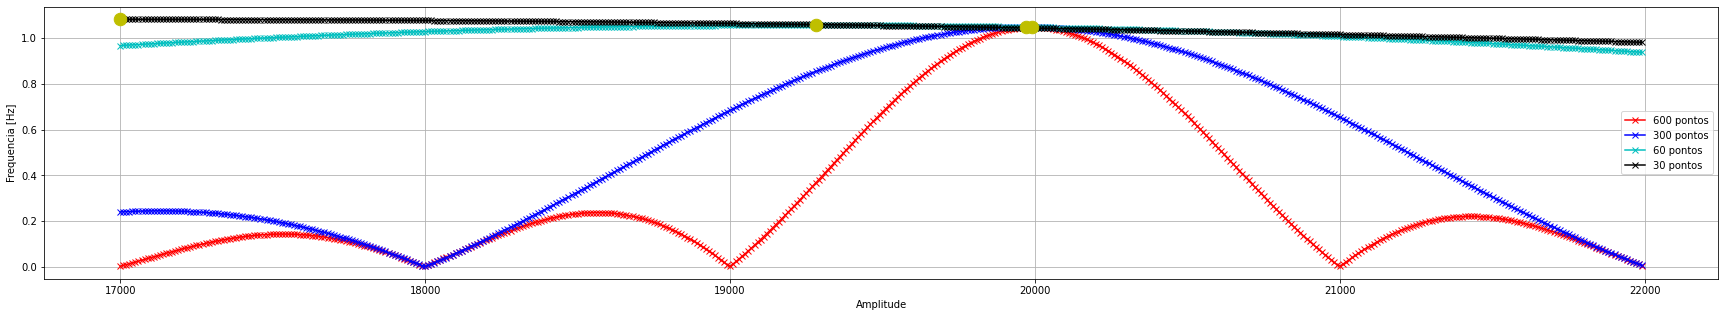

In [27]:
idx_pico = np.argmax(componentes)
idx_pico2 = np.argmax(componentes2)
idx_pico3 = np.argmax(componentes3)
idx_pico4 = np.argmax(componentes4)

plt.figure(figsize=(30,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')

plt.plot(frequencia_range3,componentes3,'cx-',label=f'{npontos3} pontos')
plt.plot(frequencia_range4,componentes4,'kx-',label=f'{npontos4} pontos')
plt.plot(frequencia_range[idx_pico], componentes[idx_pico], 'y.', markersize = 25)
plt.plot(frequencia_range2[idx_pico2], componentes2[idx_pico2], 'y.', markersize = 25)
plt.plot(frequencia_range3[idx_pico3], componentes3[idx_pico3], 'y.', markersize = 25)
plt.plot(frequencia_range4[idx_pico4], componentes4[idx_pico4], 'y.', markersize = 25)


plt.xlabel(f'Amplitude')
plt.ylabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [28]:
dados.shape[0]

10

In [29]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0509396406520255	19980	1.0509308870299672	1.0509396406520255	1.0508619818377267
1	1.0479103129944534	19980	1.0478530238031938	1.0479103129944534	1.0478815429830464
2	1.0479046316744203	19970	1.0478577963436195	1.0479046316744203	1.0478653132396871
3	1.0507841719559343	19970	1.0507742655863233	1.0507841719559343	1.0507078125921256
4	1.048475691934369	20030	1.0484668836884	1.048475691934369	1.0483979969644222
5	1.0484754110601724	19970	1.0484046149805069	1.0484754110601724	1.0484599824781256
6	1.0504204830524368	19970	1.050362773954729	1.0504204830524368	1.0503918962461916
7	1.0493662043539929	20010	1.04929444453318	1.0493662043539929	1.0493514649771247
8	1.048424377335384	19990	1.0483949663872185	1.048424377335384	1.0483677544299181
9	1.0509687951658313	20000	1.0509039454736477	1.0509687951658313	1.0509473992971663


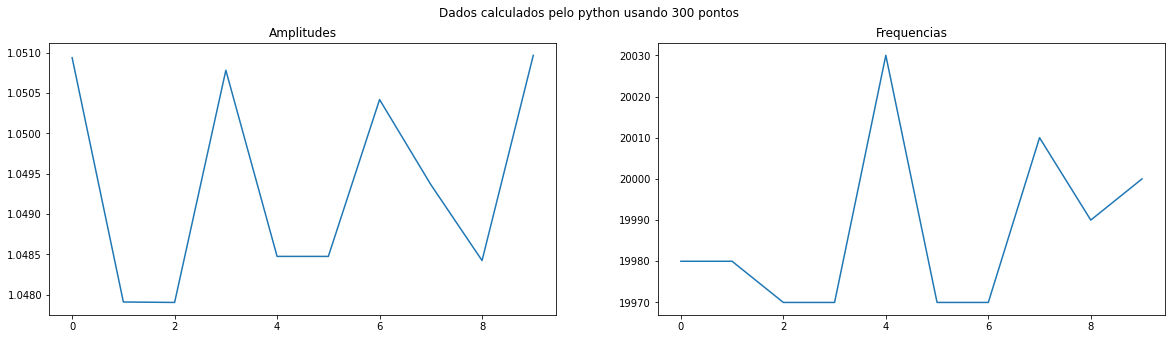

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [31]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0513182182473417	19990	1.0510413722292682	1.0513182182473417	1.0512493316543796
1	1.0480772069599202	19990	1.0477503523573224	1.0480772069599202	1.0480595750194657
2	1.0488551258354353	19990	1.0486346205895336	1.0488551258354353	1.0487307049146495
3	1.0502920626126773	19990	1.050101165410893	1.0502920626126773	1.0501374011402496
4	1.048653404774154	20010	1.0486527024289787	1.048653404774154	1.0483091071971617
5	1.047958684574072	19990	1.0477093882374018	1.047958684574072	1.0478632281044271
6	1.0487578878042398	19990	1.0485404905873164	1.0487578878042398	1.0486304515913305
7	1.0486606271760643	20000	1.048425010234372	1.0486606271760643	1.0485513702460636
8	1.0492459806787044	20000	1.049211790858223	1.0492459806787044	1.048935099846773
9	1.0499302500891483	20000	1.049759440064753	1.0499302500891483	1.04975598970775


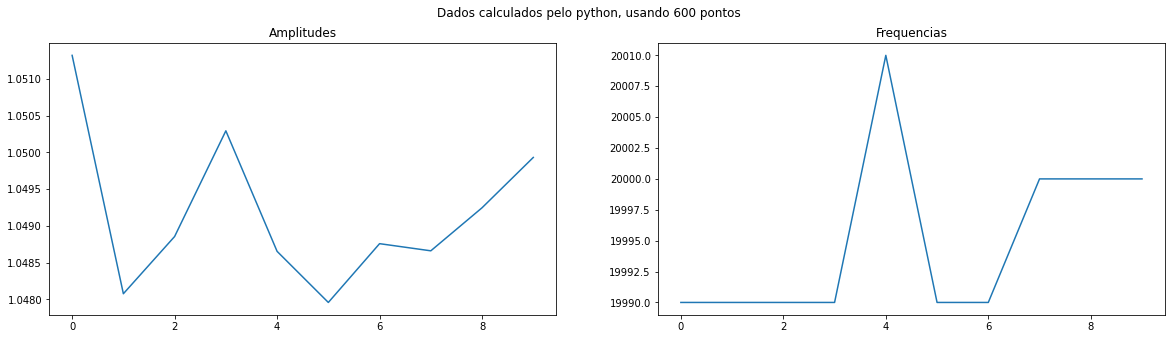

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

In [33]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 300000
    componentes2 = [componente_precisa((dados[frame,:npontos2:2]-np.mean(dados[frame,:npontos2:2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0513192588165614	19990	1.0510120891736823	1.0513192588165614	1.0512805585848195
1	1.0481550230710213	19990	1.047846651612717	1.0481550230710213	1.0481187343531642
2	1.0475066377669802	19990	1.0472361167525213	1.0475066377669802	1.0474320984552996
3	1.0498344967585453	19990	1.049645025769275	1.0498344967585453	1.0496785947501845
4	1.0470530158711946	20000	1.0467603630105526	1.0470530158711946	1.0470008674238378
5	1.0474302882631212	19990	1.047221128754953	1.0474302882631212	1.0472949007921644
6	1.0484218850792795	19990	1.048208010035525	1.0484218850792795	1.0482907614829138
7	1.0475441677834354	20000	1.047266127694455	1.0475441677834354	1.0474777546482057
8	1.0484953338106702	20000	1.0483743999133623	1.0484953338106702	1.0482713649554753
9	1.0500148733352899	20000	1.0497618538906068	1.0500148733352899	1.0499226920881755


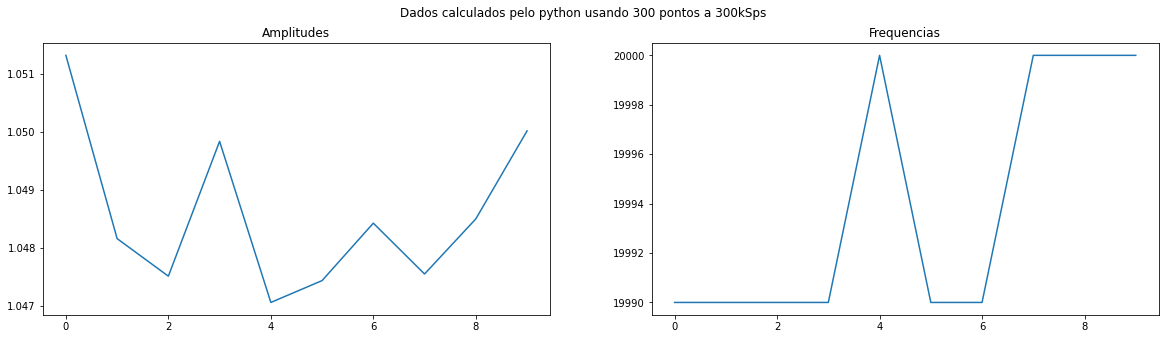

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos a 300kSps')
plt.show()

In [35]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
downsampling = 5
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,1)
    sample_freq = 600000/downsampling
    componentes2 = [componente_precisa((dados[frame,:npontos2:downsampling]-np.mean(dados[frame,:npontos2:downsampling]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0498913570125823	19998	1.049889078061949	1.0498913570125823	1.0498901831861795
1	1.0475628882041634	19989	1.047561675120222	1.0475628882041634	1.0475606582091002
2	1.0547997865363283	19992	1.0547977551336996	1.0547997865363283	1.0547983526081768
3	1.0506165098602174	19992	1.0506135496538538	1.0506165098602174	1.0506160246485585
4	1.0442858291053387	20001	1.0442836362324217	1.0442858291053387	1.0442845850559879
5	1.0469064507614783	19988	1.0469048349247074	1.0469064507614783	1.0469046318473367
6	1.0468506207981787	19993	1.046849856303931	1.0468506207981787	1.0468479426046973
7	1.0459108675437105	20005	1.0459077560152974	1.0459108675437105	1.0459105328348561
8	1.0448806157431878	20003	1.0448803448083888	1.0448806157431878	1.0448774512344075
9	1.0517637578403745	20006	1.051763592699879	1.0517637578403745	1.0517604691430527


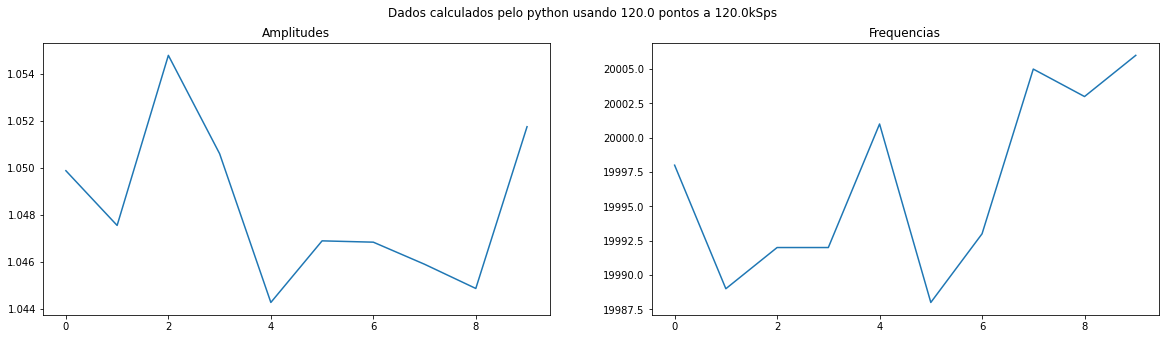

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
freq_usada = sample_freq/1000
npontos_usado = npontos2/downsampling
plt.suptitle(f'Dados calculados pelo python usando {npontos_usado} pontos a {freq_usada}kSps')
plt.show()

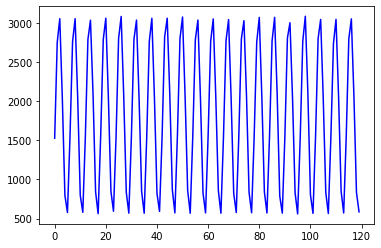

In [37]:
plt.plot(dados[0,:600:downsampling],'b') # amostrado a 300kSps

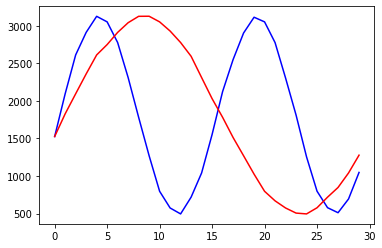

In [38]:
plt.plot(dados[0,:60:2],'b') # amostrado a 300kSps
plt.plot(dados[0,:30],'r') # amostrado a 600kSps